In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from rutas import archivo_imagenes_etiquetadas_csv
from rutas import archivo_logs_csv
from rutas import archivo_perfiles_json

df_etiq=pd.read_csv(archivo_imagenes_etiquetadas_csv)
df_logs=pd.read_csv(archivo_logs_csv)
df_json=pd.read_json(archivo_perfiles_json)

###Porcentajes según el tipo de imagen (Archivo imagenes_etiquetadas.csv)


- Se toma la columna 'mimetype' del dataFrame para obtener la extensión del tipo de imagen.
- Aplico el método split('x') para dividir la cadena y asi obtener la extensión.
- Realizo un conteo de cada extensión. Se generá una serie  con las extensiones  y sus respectiva   cantidad de ocurrencias.
- Almaceno en la variable etiquetas los índices de la serie(extensiones).
--Se usa la función plt.pie() para crear el gráfico de Torta.



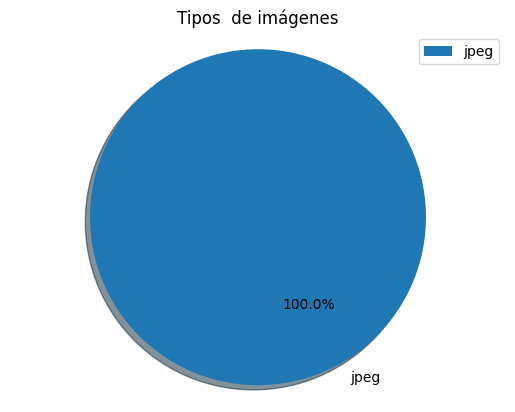

In [16]:

extensiones = df_etiq['mimetype'].str.split('/').str[1].value_counts()
etiquetas = extensiones.index

plt.pie(extensiones, labels=etiquetas, autopct='%1.1f%%',
        shadow=True, startangle=120, labeldistance=1.1)

plt.axis('equal')
plt.legend(etiquetas)
plt.title("Tipos  de imágenes")

plt.show()

###Alto y ancho máximos (Archivo imagenes_etiquetadas.csv)

- Se toma la columna 'resolucion' del DataFrame para obtener el alto y ancho de las imagenes.
- Aplico el método split('x') para dividir la cadena y asi obtener el alto y el ancho de cada imagen.
- Se hace la conversión a entero tanto del alto como del ancho y aplico la funcion max para obtener el máximo.

In [3]:
maximo_alto = df_etiq['resolucion'].str.split('x').str[1].astype(int).max()
maximo_ancho = df_etiq['resolucion'].str.split('x').str[0].astype(int).max()

print(f"Máximo alto: {maximo_alto}px")
print(f"Máximo ancho: {maximo_ancho}px")

Máximo alto: 1747px
Máximo ancho: 1920px


###Relación entre el alto y ancho de las imágenes (Archivo imagenes_etiquetadas.csv).


-Voy a usar los valores de la columna 'resolucion'.

-Aplico el método split('x') para dividir la cadena y asi obtener el alto y el ancho de cada imagen. Luego convierto a entero en valor.

-Se usa la función plt.scatter() para crear el gráfico de dispersión.

-Se establece el ancho como los valores del eje x y el alto para los valores del eje y.

-Tambien se establacen las etiquetas para cada eje (alto y ancho).

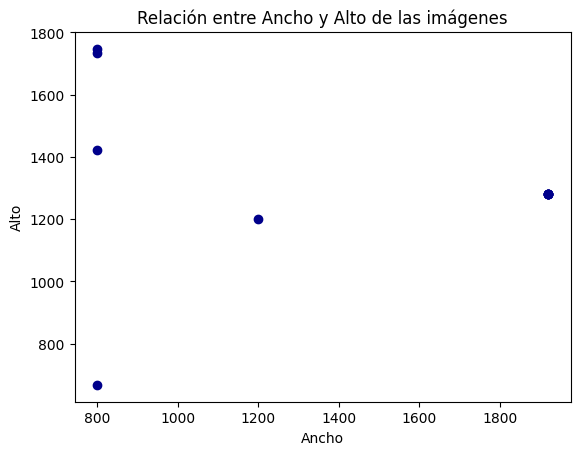

In [4]:
ancho = df_etiq['resolucion'].str.split('x').str[0].astype(int)
alto = df_etiq['resolucion'].str.split('x').str[1].astype(int)

plt.scatter(ancho, alto, c="DarkBlue")
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.title('Relación entre Ancho y Alto de las imágenes')
plt.show()

###Cantidad de cambios realizados para cada dia de la semana en base a la úlltima actualización (Archivo imagenes_etiquetadas.csv).


-Se trabaja con los datos de la columna 'ultima_actualización'.
-Se hace una copia del DataFrame ya que se va modificar.
-Se define un diccionario dias que mapea los nombres de los días en inglés a sus correspondientes en español.
-con la función pd.to_datetime() convierto el timestamp a un objeto de fecha y hora de pandas.
-Se agrega una nueva columna llamada "dia" al DataFrame cambios_segun_dia que contiene los nombres de los días en español. Con la funcion dt.day_name() se obtiene el nombre del dia de la semana y luego lo mapea al español con el diccionario definido anteriormente.
-Se realiza un conteo para cada día
-Para que todos los dias de la semana estén en el gráfico se reindexa la serie con los dias y se rellena los espacios vacios con 0, usando fill_value=0.
-En la variable colores se define la lista de colores que tendrá el gráfico.
-con plt.bar() creo el gráfico de barras,  con los nombres de los días en el eje x, y los conteos de cambios en el eje y.

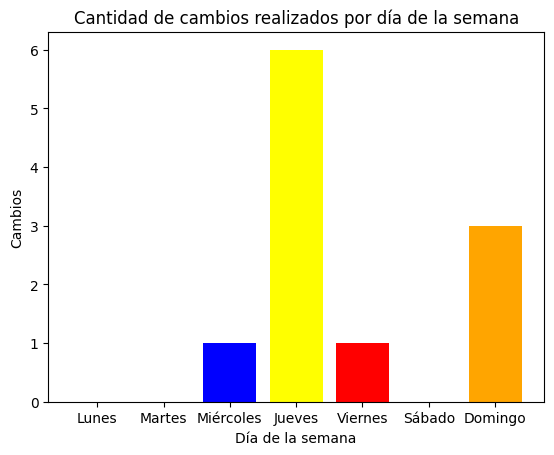

In [5]:
cambios_segun_dia = df_etiq.copy()
dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}
cambios_segun_dia["ultima_actualizacion"] = pd.to_datetime(df_etiq["ultima_actualizacion"])
cambios_segun_dia["dia"]= cambios_segun_dia["ultima_actualizacion"].dt.day_name().map(dias)
conteo_dias= cambios_segun_dia["dia"].value_counts()

dias_semana = list(dias.values())
conteo_dias = conteo_dias.reindex(dias_semana, fill_value=0)

colores = ["green","purple","blue","yellow","red", "black", "orange"]
plt.bar(conteo_dias.index, conteo_dias.values, color=colores)
plt.xlabel('Día de la semana')
plt.ylabel('Cambios')
plt.title('Cantidad de cambios realizados por día de la semana')
plt.show()

#Inciso 5 de archivo imagenes etiquetadas

Crear un gráfico de líneas para visualizar la evolución de la cantidad de
actualizaciones a lo largo del tiempo:


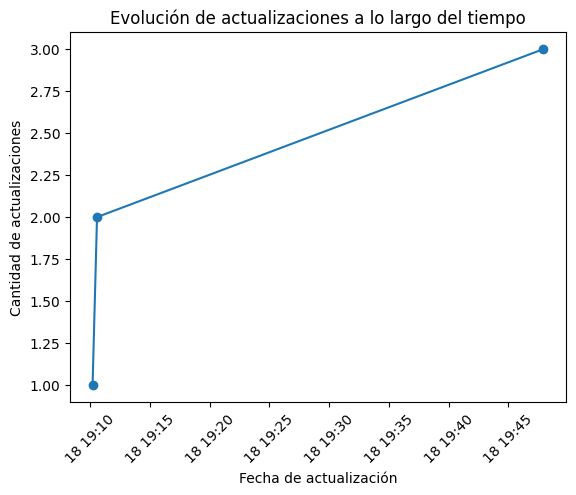

In [3]:
#Mi código va acá (Eze)


# Convertir la columna 'ultima_actualizacion' en formato de fecha y hora
df_etiq['ultima_actualizacion'] = pd.to_datetime(df_etiq['ultima_actualizacion'])

# Ordenar el DataFrame por la columna 'ultima_actualizacion'
df_etiq2 = df_etiq.sort_values('ultima_actualizacion')

# Crear el gráfico de líneas
plt.plot(df_etiq2['ultima_actualizacion'], range(1, len(df_etiq) + 1), marker='o')

# Configurar los ejes y el título
plt.xlabel('Fecha de actualización')
plt.ylabel('Cantidad de actualizaciones')
plt.title('Evolución de actualizaciones a lo largo del tiempo')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



#Inciso 6 de archivo de imagenes etiquetadas

Nube de palabras en base a la lista de tags:


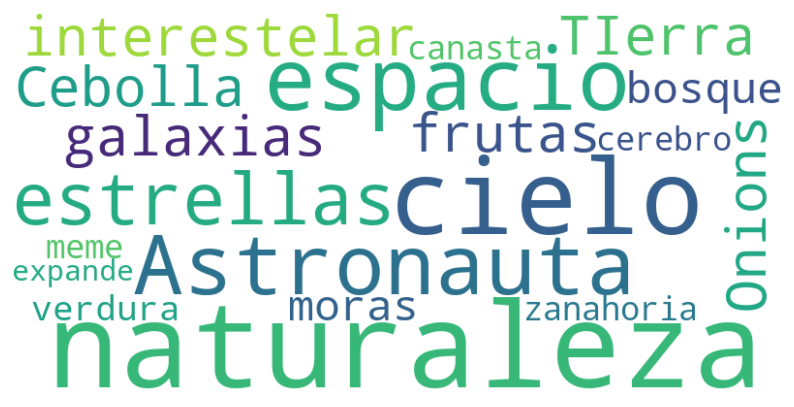

In [17]:
tags = df_etiq['tags'].dropna().values
#organizo los tags para poder tratarlos
tags_string = ', '.join(tags)

#Creo el objeto WordCloud y genero la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_string)

# Muestro la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Inciso 7 de archivo de imagenes etiquetadas

Tags más utilizados

- Se hace una copia del DataFrame obtenido del archivo de imagenes etiquetadas, ya que va a ser modificado.
- Se aplica el método str.split(',') a la columna 'tags' del DataFrame para dividir la cadena de tags de cada imagen.
- Luego nos quedamos con sola la columna 'tags' del DataFrame, se le aplica el metodo explode() para separar cada uno de los tags en una fila diferente y lo devuelve en una serie, se aplica el método strip(' ') para eliminar espacios que esten demas.
- Se aplica el método value_counts() para contabalizar cada uno de los tags, retorna una serie con cada tag y la cantidad de veces que apareció.
- Se aplica la función reset_index(name="Usos") para convertir la serie en un DataFrame y que se visualice de mejor manera.
- Por ultimo se cambió el nombre de la columna 'tags' por 'Tags' con la funcion rename.

In [8]:
df_7=df_etiq.copy()

df_7['tags']=df_7['tags'].str.split(',')
df_7=df_7['tags'].explode().str.strip(' ').value_counts().reset_index(name="Usos")
df_7=df_7.rename(columns={'tags': 'Tags'})

print("Tags más utilizados")
df_7

Tags más utilizados


,Tags,Usos
0,frutillaaa,6
1,frutillaaaasd,6
2,mira,1
3,miraaa,1


#Inciso 8 de archivo de imagenes etiquetadas
    Imagenes promedio

- Se trae el DataFrame obtenido del archivo de imagenes etiquetadas con el nombre de la columna 'ultimo_perfil' modificado a 'Usuario'. Esto para poder realizar el merge
- Se hace un merge con el DataFrame ya mencionado y el DataFrame del archivo json de perfiles con la modalidad "outer" para incluir aquellos usuarios que no hayan modificado imagenes.
- Se le aplica la funcion groupby() para agrupar por Usuario, y a la columna tamaño le aplico la funcion mean() para sacar los promedio de los tamaños para cada usuario, con fillna(0) le agrego un 0 a aquellos usuarios que nunca hayan modificado una imagen y con round(2) solo muestro dos decimales de esta columna.
- Como nos retorna una serie, se le aplica reset_index() para volver a la estructura DataFrame.

In [9]:
df_8=df_etiq.rename(columns={'ultimo_perfil': 'Usuario'})

outer_join=pd.merge(df_8,df_json,on="Usuario",how="outer")
tabla_final=outer_join.groupby(outer_join["Usuario"])["tamaño"].mean().fillna(0).round(2).reset_index(name="Tamaño (MB)")

print('Imagenes promedio')
tabla_final

Imagenes promedio


,Usuario,Tamaño (MB)
0,Test,0.32
1,sium,0.00


#Inciso 1, archivo logs

Operaciones por dias de la semana

- Se crea un DataFrame con cada uno de los dias de la semana representados como enteros, siendo 0 el lunes. Esto se hace para que en el caso de en un dia de la semana no haya habido usos de la aplicacion, aun asi se contabilice.
- Se crea una copia del DataFrame del archivo de logs ya que se va a modificar.
- A esta copia se le agrega la columna 'Dia', en la cual se va a almacenar el resultado de aplicarle la funcion datetime.fromtimestamp() a cada uno de los contenidos de la columna
'Fecha y Hora' que tiene almacenada el mymetype de cuando se ejecutó la acción. Esto va a retornar la fecha.
- Luego con el metodo groupby() y pasandole como parametro df_logs1['Dia'].dt.day_of_week, agrupo cada dia de la semana correspondiente a cada fecha y aplicando size() obtengo una serie que muestra el tamaño de cada dia.
- Como luego se hará un merge(), la serie necesita ser nombrada, se hace con df_logs1.name=
- Luego se hace el merge del dataframe creado al principio y de la serie resultante, con la modalidad "outer" y sobre "Dia" para que incluya aquellos dias en los que no se haya usado la aplicacion.
- A la columna 'Cantidad' se le aplica la funcion fillna(0) para que llene aquellos lugares Na, con 0, y astype(int) para convertir los numeros a integer, retorna una serie.
- Se cambian los indices de la serie por los nombres de los dias de la semana.
- Se establecen los colores que se mostraran para cada grafico de barra.
- Luego se arma el grafico con la serie y se establece el titulo y los nombres de los ejes.

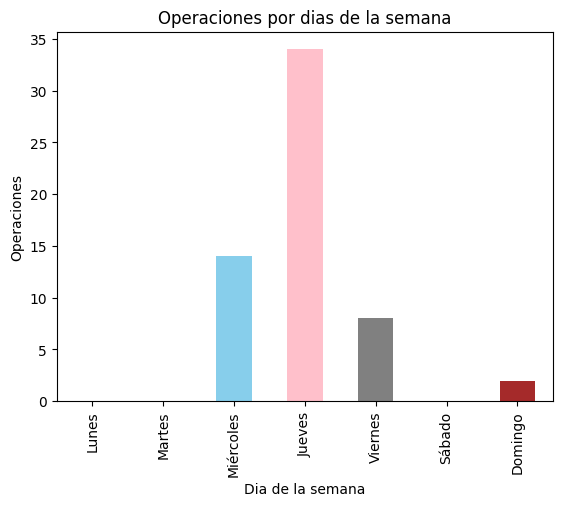

In [10]:
from datetime import datetime
df_dias =pd.DataFrame({'Dia': [0, 1, 2, 3, 4, 5, 6]})

df_logs1=df_logs.copy()
df_logs1['Dia']=df_logs1['Fecha y Hora'].apply(lambda x: datetime.fromtimestamp(x))
df_logs1=df_logs1.groupby(df_logs1['Dia'].dt.day_of_week).size()
df_logs1.name='Cantidad'

outer_join=pd.merge(df_dias,df_logs1,on='Dia',how="outer")
outer_join=outer_join['Cantidad'].fillna(0).astype(int)

outer_join.index=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

colores = ['red', 'green', 'skyblue', 'pink', 'gray', 'yellow', 'brown']
outer_join.plot.bar(color=colores)
plt.title('Operaciones por dias de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Operaciones')
plt.show()

#Inciso 2, archivo logs

Uso de la aplicación por género

- Se hace una copia del DatFrame del archivo de logs, y se le cambia el nombre a la columna 'Nick' por 'Usuario'
- Se hace un merge con el DataFrame del json de usuarios y el DataFrame obtenido anteriormente, por la columna "Usuario" y del modo "inner" para que solo tenga en cuenta aquellos usuarios que si realizaron cambios en la aplicacion.
- Luego se los agrupa por genero y se aplica la funcion count() que devuelve la cantidad de operaciones por genero en una serie.
- Luego armamos el grafico de torta con matplotlib y la serie usando los indices para la legenda, y lo almacenado en cada indice para la torta en si.

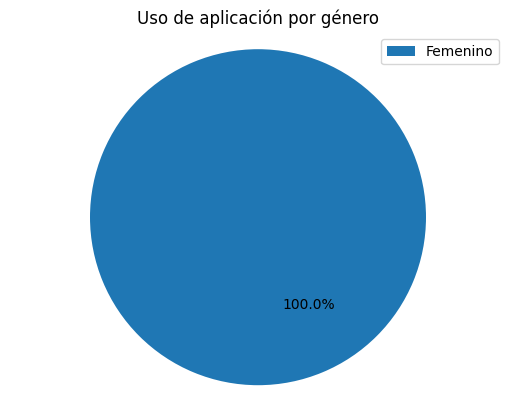

In [11]:
df_logs2=df_logs.copy().rename(columns={'Nick': 'Usuario'})
inner_join=pd.merge(df_logs2,df_json,on="Usuario",how="inner")
serie=inner_join.groupby(inner_join["Genero"])["Genero"].count()

plt.pie(serie,autopct='%1.1f%%',startangle=120, labeldistance=1.1)
plt.axis('equal')
plt.legend(serie.index)
plt.title("Uso de aplicación por género")
plt.show()

#Inciso 3, archivo logs

● Generar un gráfico que refleje las cantidades de cada operación realizada.


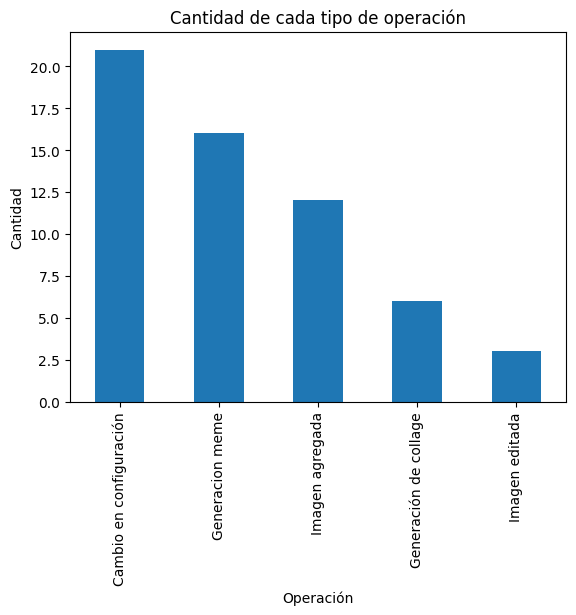

In [12]:
#Mí codigo va acá (Eze)
operaciones_counts = df_logs['Operación'].value_counts()

# Crear el gráfico de barras
operaciones_counts.plot(kind='bar')

# Configurar los ejes y el título
plt.xlabel('Operación')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada tipo de operación')

# Mostrar el gráfico
plt.show()

#Inciso 4, archivo logs
Generar un gráfico de barra apilado que muestre las cantidades de operaciones por
nick.


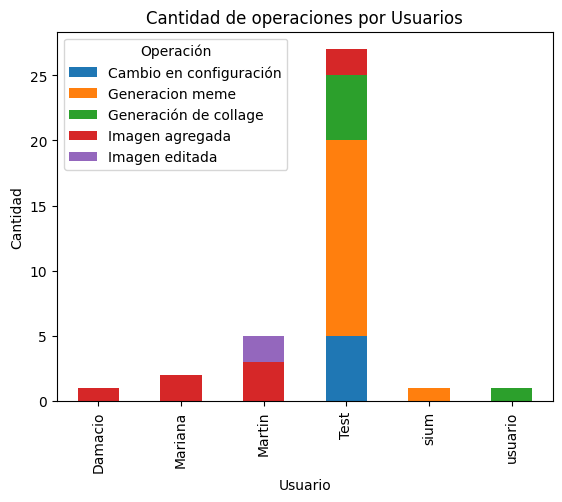

In [13]:
#Mi código va acá (Eze)
operaciones_por_nick = df_logs.groupby('Nick')['Operación'].value_counts().unstack()

# Crear el gráfico de barras apilado
operaciones_por_nick.plot(kind='bar', stacked=True)

# Configurar los ejes y el título
plt.xlabel('Usuario')
plt.ylabel('Cantidad')
plt.title('Cantidad de operaciones por Usuarios')

# Mostrar el gráfico
plt.show()

### Inciso 5 archivo logs



- Copio en una variable el archivo logs
- Agrupo en otra variable lo que hay en la columna operacion y es igual a generacion meme
- Cambio el nombre de la columna valores por Imagenes
- Armo la tabla por cantidad de usos de la imagen

In [21]:
df_ranking = df_logs.copy()

memes_mas_usados = df_ranking.loc[(df_ranking["Operación"] == 'Generacion meme')]

memes_mas_usados = memes_mas_usados.rename(columns={'Valores': 'Imagenes'})

memes_mas_usados = memes_mas_usados.groupby('Imagenes').size().sort_values(ascending=False).reset_index(name='Veces usada').head(5)

print('Imagenes usadas para memes')
memes_mas_usados


Imagenes usadas para memes


,Imagenes,Veces usada
0,Template_dos_botones.jpg,1


- Copio en una variable el archivo logs
- limpio los valores del str en la columna valores
- Utilizo la funcion explode para separar los valores de la lista
- Agrupo en otra variable lo que hay en la columna operacion y es igual a generacion collage
- Cambio el nombre de la columna valores por Imagenes
- Armo la tabla por cantidad de usos de la imagen

In [20]:
df_ranking = df_logs.copy()

df_ranking['Valores'] = df_ranking['Valores'].str.split(";")

df_ranking = df_ranking.explode('Valores')

collage_mas_usados = df_ranking.loc[(df_ranking["Operación"] == 'Generación de collage')]

collage_mas_usados = collage_mas_usados.rename(columns={'Valores': 'Imagenes'})

collage_mas_usados = collage_mas_usados.groupby('Imagenes').size().sort_values(ascending=False).reset_index(name='Veces usada').head(5)

print('Imagenes mas usadas para collage')
collage_mas_usados


Imagenes mas usadas para collage


,Imagenes,Veces usada
0,img2.jpg,1
1,img3.jpg,1
2,img4.jpg,1


### Inciso 6 archivo logs

- Copio el archivo logs en una variable
- Separo los valores de que estan en la columna texto
- Agru
- Agrupo en otra variable lo que haya en la columna de operacion y sea igual a generar meme
- Guardo en una lista los valores que tenga texto
- Imprimo en forma de nube

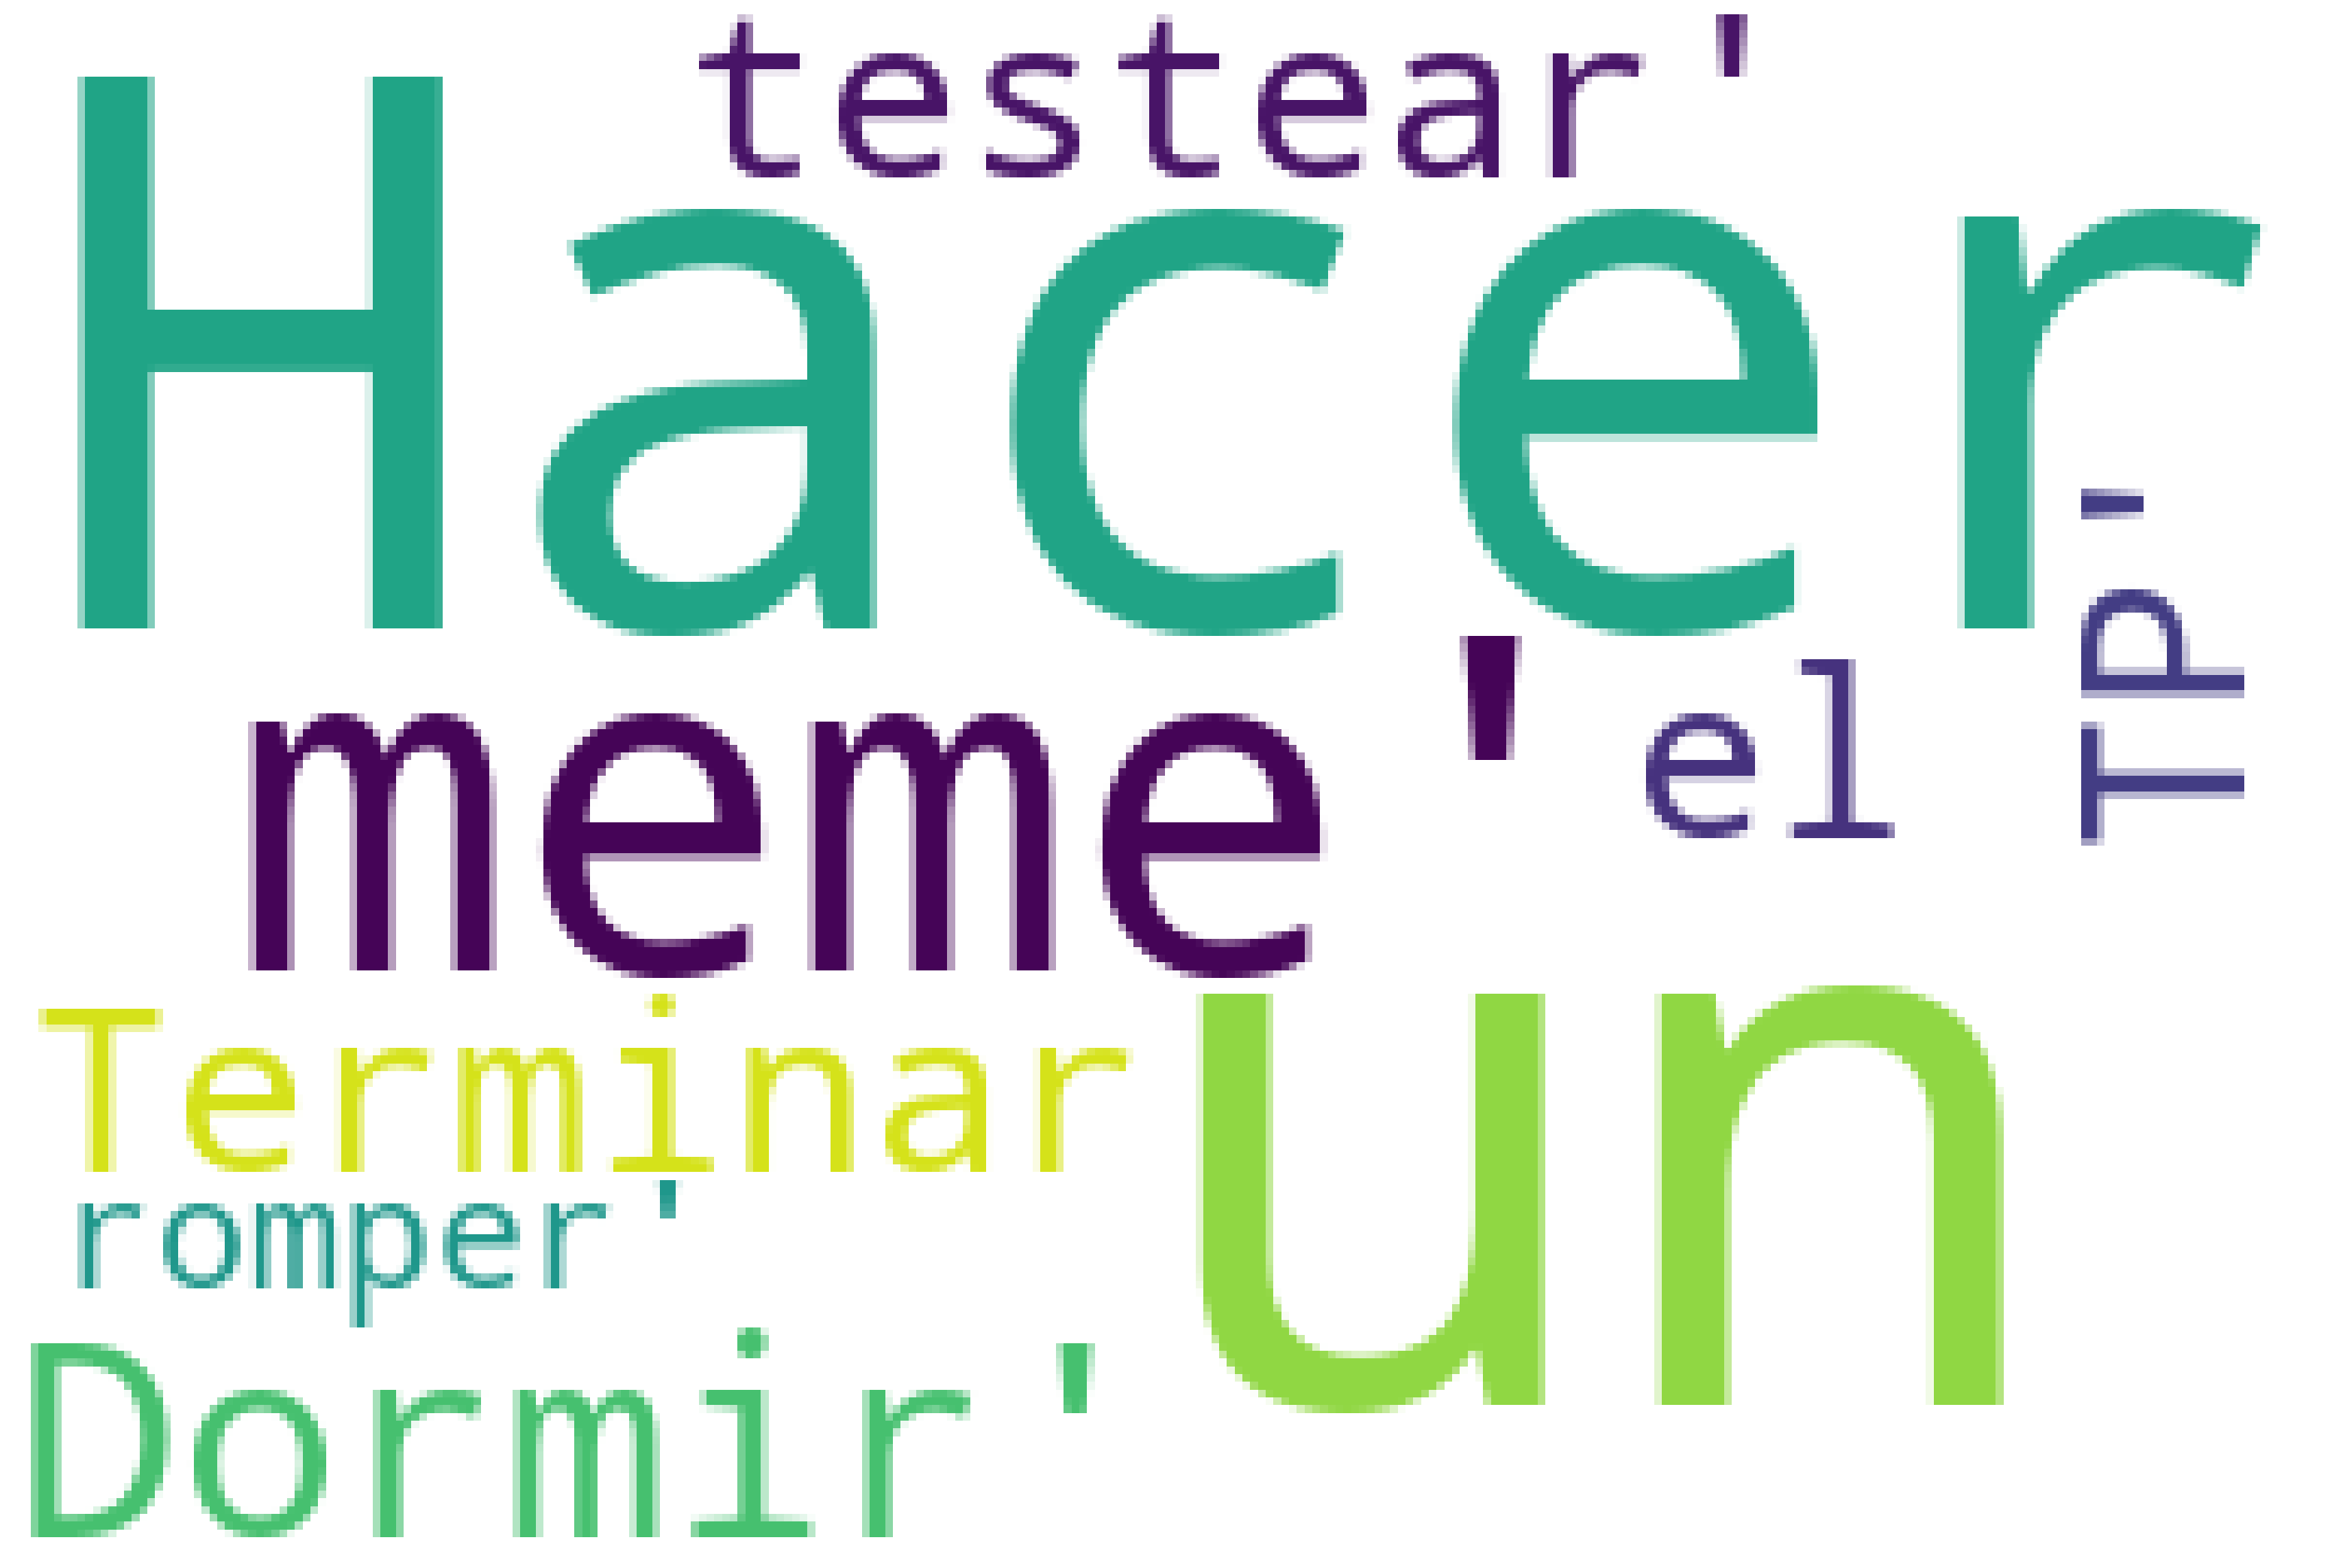

In [19]:
df_nube = df_logs.copy()

df_nube['Textos'] = df_nube['Textos'].str.split(";")

df_nube = df_nube.explode('Textos')

textos_memes = df_nube.loc[(df_nube["Operación"] == 'Generacion meme')]

lista_textos = textos_memes['Textos'].unique()

lista_textos=str(lista_textos)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
    
# Generate wordcloud
wordcloud = WordCloud(width = 300, height = 200, 
               background_color='white').generate(lista_textos)
#Plot
plot_cloud(wordcloud)

- Copio el archivo logs en una variable
- Agrupo en otra variable lo que haya en la columna de operacion y sea igual a generar collage
- Guardo en una lista los valores que tenga texto
- Imprimo en forma de nube

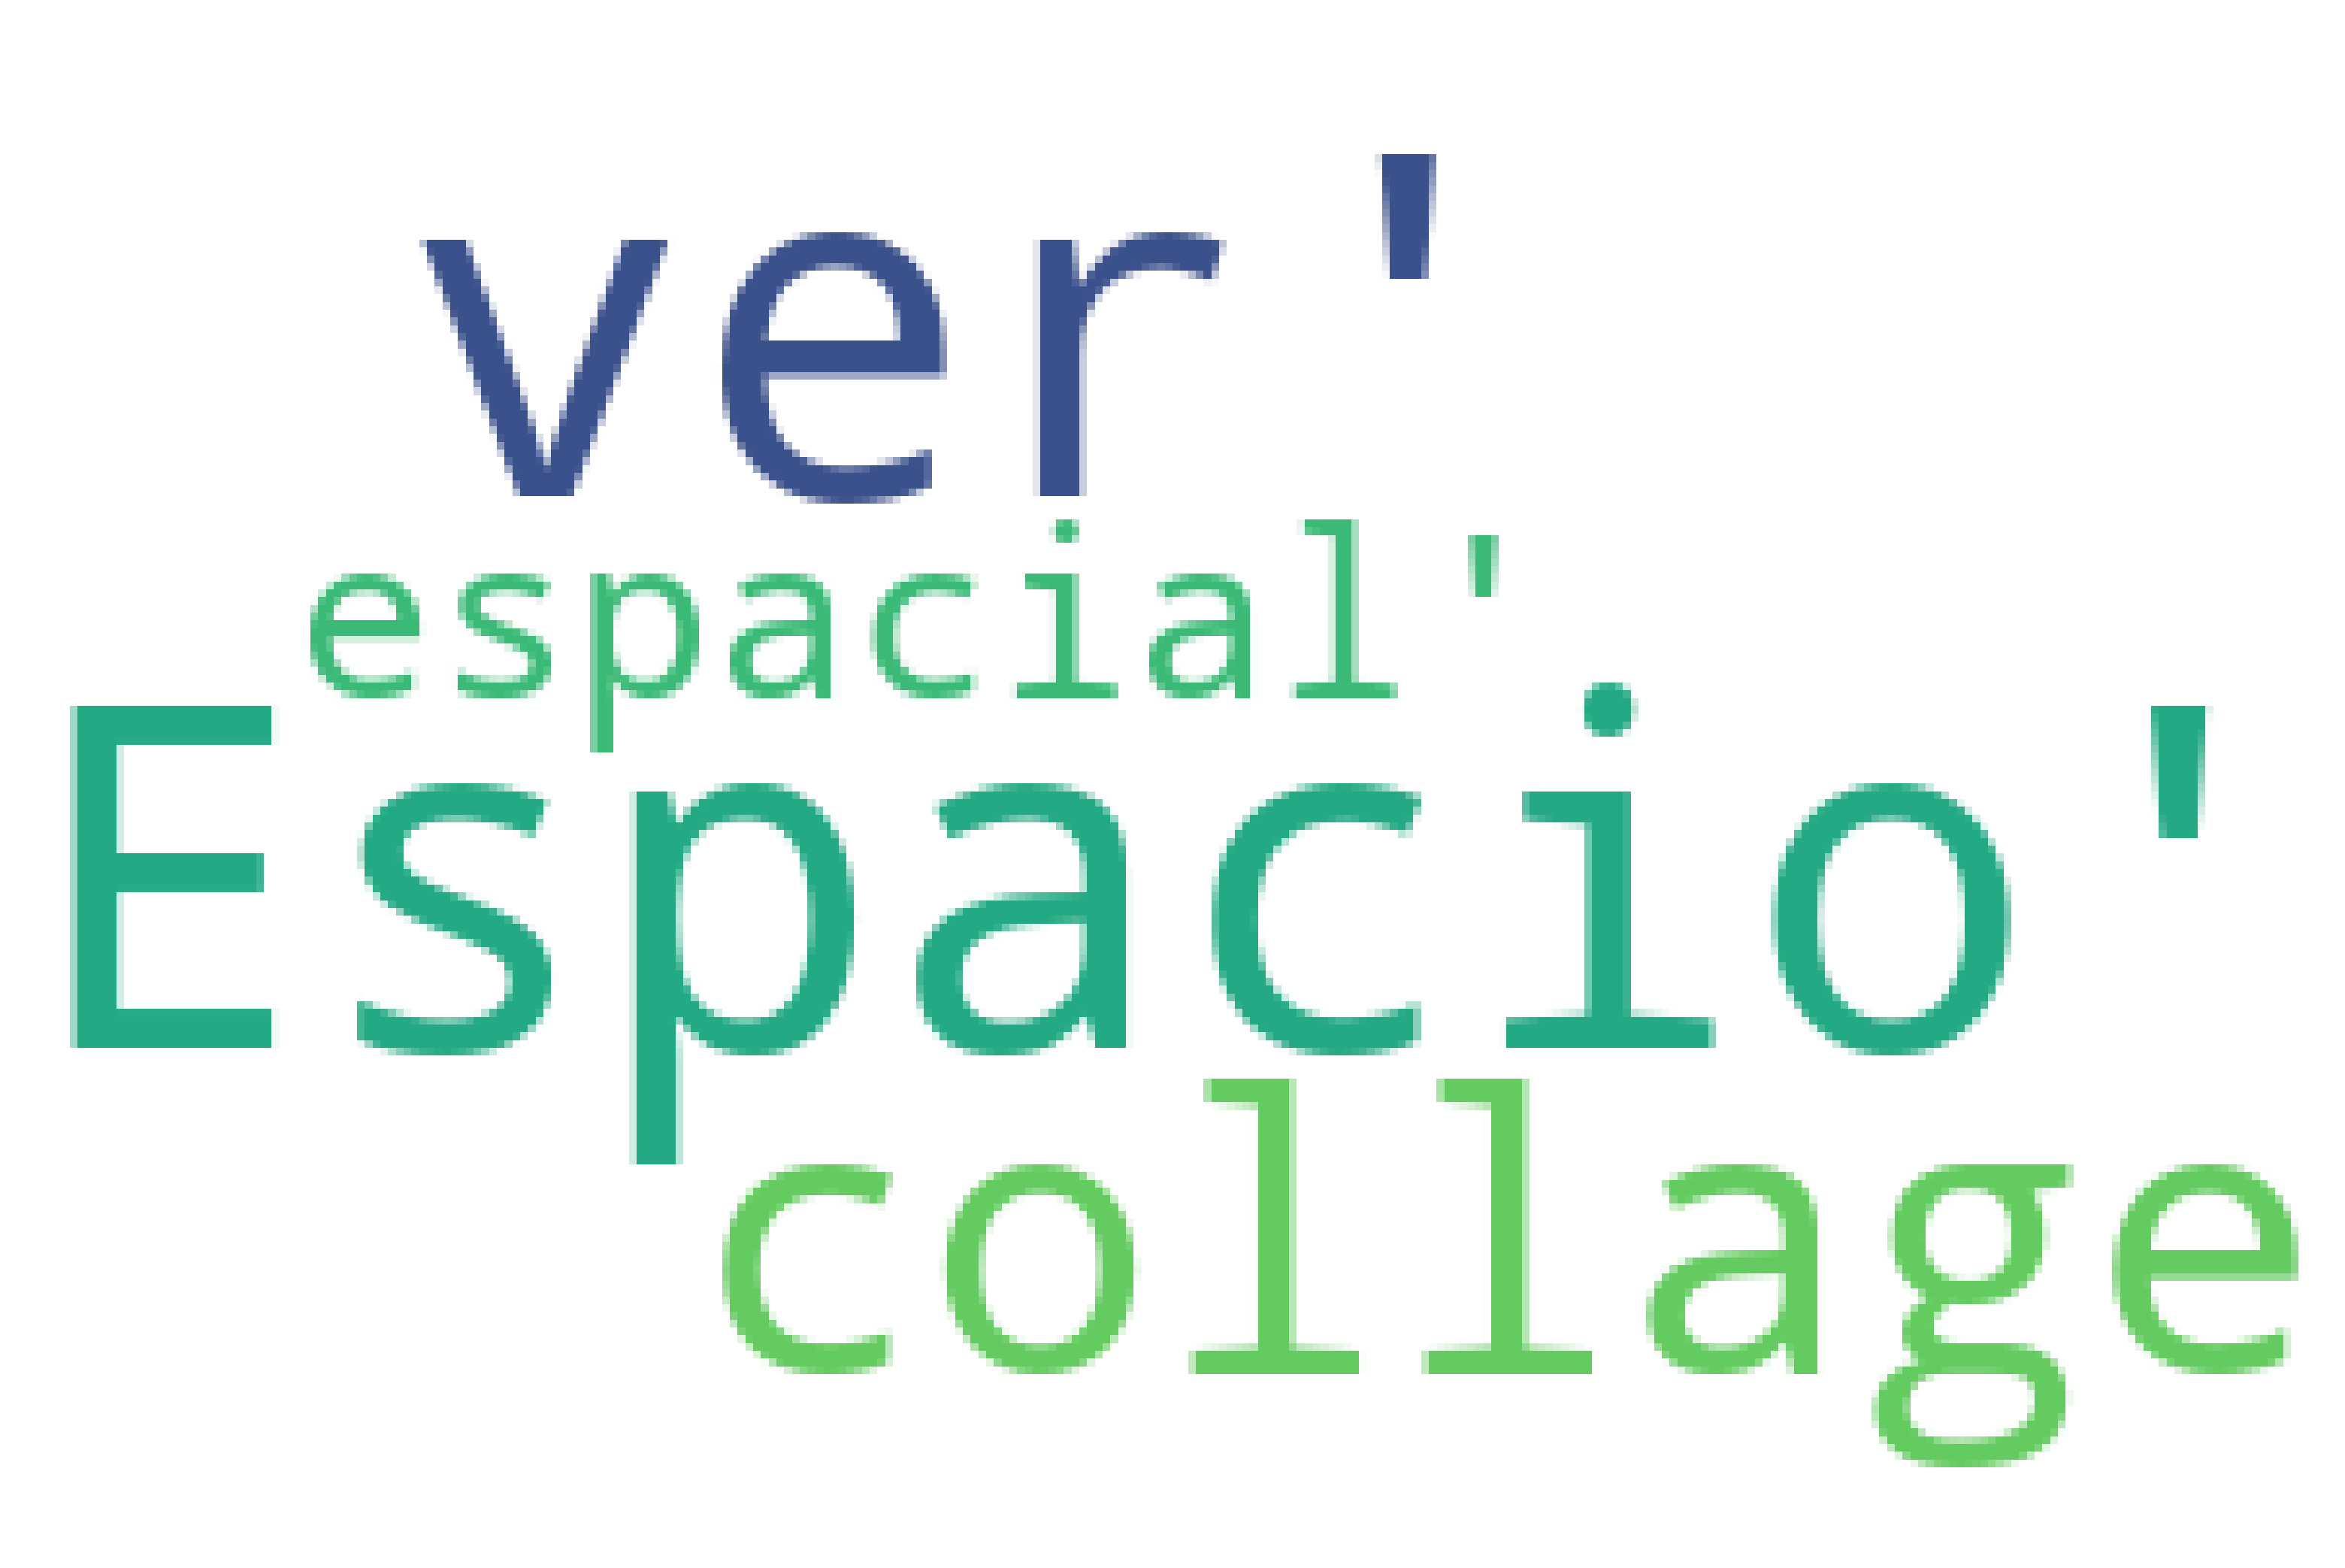

In [20]:
df_nube = df_logs.copy()

textos_collage = df_nube.loc[(df_nube["Operación"] == 'Generación de collage')]

lista_textos = textos_collage['Textos'].unique()

lista_textos=str(lista_textos)

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
    
# Generate wordcloud
wordcloud = WordCloud(width = 300, height = 200, 
                background_color='white').generate(lista_textos)
# Plot
plot_cloud(wordcloud)

### Inciso 7 archivo logs

- Copio el archivo log en una variable y renombro la columna Nick por Usuario
- Uno el archivo logs con el archivo json por la columna usuario
- Agrupo en una nueva variable quienes hayan hecho la operacion de editar una imagen
- Imprimo en un grafico segun el genero que haya hecho dichas operaciones

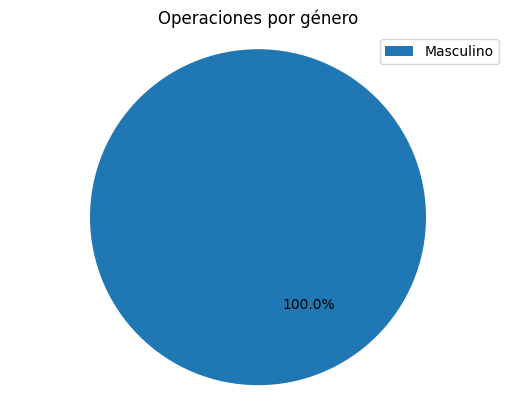

In [37]:
df_merge = df_logs.copy().rename(columns={'Nick': 'Usuario'})

df_merge = pd.merge(df_merge,df_json,on="Usuario",how="inner")
df_genero = df_merge.loc[((df_merge["Operación"] == 'Imagen agregada') | (df_merge["Operación"] 
                                                                        == 'Imagen editada'))]
serie=df_merge.groupby(df_genero["Genero"])["Genero"].count()

plt.pie(serie,autopct='%1.1f%%',startangle=120, labeldistance=1.1)
plt.axis('equal')
plt.legend(serie.index)
plt.title("Operaciones por género")
plt.show()